## Markdown

In [59]:
%matplotlib  inline

# Imports
import cPickle as pickle
import datetime
import gzip
import igraph
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import numpy
import pandas

In [18]:
def build_graph(edges):
	'''
	Load the hierarchical Code graph.
	'''
    # Populate node set
	nodes = set()
	for e in edges:
		nodes.update(e)

    # Setup node ID mapping
	nodes = sorted(list(nodes))
	node_map = dict(zip(nodes, range(len(nodes))))
	
    # Remap edges
	edge_ids = [(node_map[e[0]], node_map[e[1]]) for e in edges]
	g = igraph.Graph(edge_ids)

	return g, nodes

In [19]:
# Load pickle data
gz_file = gzip.GzipFile('/nfs-data/documents/papers/StatCode/data/20100308.pickle.gz', 'r')
hierarchy_edges, citation_edges, _, _ = pickle.load(gz_file)
gz_file.close()

# Create graphs
hg, hnodes = build_graph(hierarchy_edges)
cg, cnodes = build_graph(citation_edges)

In [9]:
# Get layout
l = hg.layout_reingold_tilford_circular()

coord_df = pandas.DataFrame(l.coords, columns=["x", "y"])
coord_df.loc[:, "xs"] = (coord_df["x"] - coord_df["x"].min()) / (coord_df["x"].max() - coord_df["x"].min())
coord_df.loc[:, "ys"] = (coord_df["y"] - coord_df["y"].min()) / (coord_df["y"].max() - coord_df["y"].min())
coord_df.head()

,x,y,xs,ys
0,-1.946229,-0.460645,0.413306,0.463405
1,4.999945,0.023491,0.823043,0.493163
2,4.999942,0.024175,0.823043,0.493205
3,4.999938,0.024859,0.823043,0.493247
4,4.999935,0.025544,0.823043,0.493289


In [12]:
# Create plot figure and clean up axes
ax = plt.subplot(111)
f = plt.gcf()
f.set_size_inches(8,8)
f.set_dpi(300)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis("off")

# Create line collection
lc = []
for e in hg.es:
    lc.append([(coord_df.loc[e.source, "xs"], coord_df.loc[e.source, "ys"]),
               (coord_df.loc[e.target, "xs"], coord_df.loc[e.target, "ys"])])

# Add to figure
_ = ax.add_collection(mc.LineCollection(lc, color="#545454", alpha=0.25, linewidths=0.1))

del lc

plt.savefig("../figures/us_code_20100308_hierarchy.png", figsize=(16, 16), dpi=400)
plt.savefig("../figures/us_code_20100308_hierarchy.eps", figsize=(16, 16), dpi=400)
plt.savefig("../figures/us_code_20100308_hierarchy.pdf", figsize=(16, 16), dpi=400)
plt.close(plt.gcf())

In [21]:
%%time
clean_edges = [(e[0], e[1]) for e in citation_edges if e[0] in hnodes and e[1] in hnodes]

CPU times: user 1min 27s, sys: 108 ms, total: 1min 27s
Wall time: 1min 26s


In [25]:
# Build citation network
node_map = dict(zip(hnodes,range(len(hnodes))))
clean_edge_ids = [(node_map[e[0]], node_map[e[1]]) for e in clean_edges]
clean_cg = igraph.Graph(clean_edge_ids)
print((clean_cg.vcount(), clean_cg.ecount()))

(51918, 85004)


In [31]:
1+1

2

In [29]:
# Get layout
cl = cg.layout_fruchterman_reingold()

,x,y,xs,ys
0,-1.946229,-0.460645,0.413306,0.463405
1,4.999945,0.023491,0.823043,0.493163
2,4.999942,0.024175,0.823043,0.493205
3,4.999938,0.024859,0.823043,0.493247
4,4.999935,0.025544,0.823043,0.493289


In [32]:
c_coord_df = pandas.DataFrame(cl.coords, columns=["x", "y"])
c_coord_df.loc[:, "xs"] = (c_coord_df["x"] - c_coord_df["x"].min()) / (c_coord_df["x"].max() - c_coord_df["x"].min())
c_coord_df.loc[:, "ys"] = (c_coord_df["y"] - c_coord_df["y"].min()) / (c_coord_df["y"].max() - c_coord_df["y"].min())
c_coord_df.head()

,x,y,xs,ys
0,-8606.062909,-4508.877092,0.376907,0.417744
1,-3723.068939,1986.643432,0.451217,0.516284
2,-5840.910911,3066.340076,0.418987,0.532664
3,-12438.750631,30923.102869,0.318581,0.955265
4,51.398944,-7665.688872,0.508658,0.369853


In [34]:
# Create plot figure and clean up axes
ax = plt.subplot(111)
f = plt.gcf()
f.set_size_inches(8,8)
f.set_dpi(300)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis("off")

# Create line collection
lc = []
for e in clean_cg.es:
    try:
        lc.append([(c_coord_df.loc[e.source, "xs"], c_coord_df.loc[e.source, "ys"]),
               (c_coord_df.loc[e.target, "xs"], c_coord_df.loc[e.target, "ys"])])
    except:
        continue

# Add to figure
_ = ax.add_collection(mc.LineCollection(lc, color="#dc143c", alpha=0.1, linewidths=0.1))

del lc

plt.savefig("../figures/us_code_20100308_citation.png", figsize=(16, 16), dpi=400)
plt.savefig("../figures/us_code_20100308_citation.eps", figsize=(16, 16), dpi=400)
plt.savefig("../figures/us_code_20100308_citation.pdf", figsize=(16, 16), dpi=400)
plt.close(plt.gcf())

In [27]:
# Create plot figure and clean up axes
ax = plt.subplot(111)
f = plt.gcf()
f.set_size_inches(8,8)
f.set_dpi(300)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis("off")

# Create line collection
lc = []
for e in hg.es:
    lc.append([(coord_df.loc[e.source, "xs"], coord_df.loc[e.source, "ys"]),
               (coord_df.loc[e.target, "xs"], coord_df.loc[e.target, "ys"])])

# Add to figure
_ = ax.add_collection(mc.LineCollection(lc, color="#545454", alpha=0.1, linewidths=0.1))

del lc

# Create line collection
lc = []
for e in clean_cg.es:
    lc.append([(coord_df.loc[e.source, "xs"], coord_df.loc[e.source, "ys"]),
               (coord_df.loc[e.target, "xs"], coord_df.loc[e.target, "ys"])])

# Add to figure
_ = ax.add_collection(mc.LineCollection(lc, color="#dc143c", alpha=0.1, linewidths=0.05))

del lc

plt.savefig("../figures/us_code_20100308_all.png", figsize=(16, 16), dpi=400)
plt.savefig("../figures/us_code_20100308_all.eps", figsize=(16, 16), dpi=400)
plt.savefig("../figures/us_code_20100308_all.pdf", figsize=(16, 16), dpi=400)
plt.close(plt.gcf())

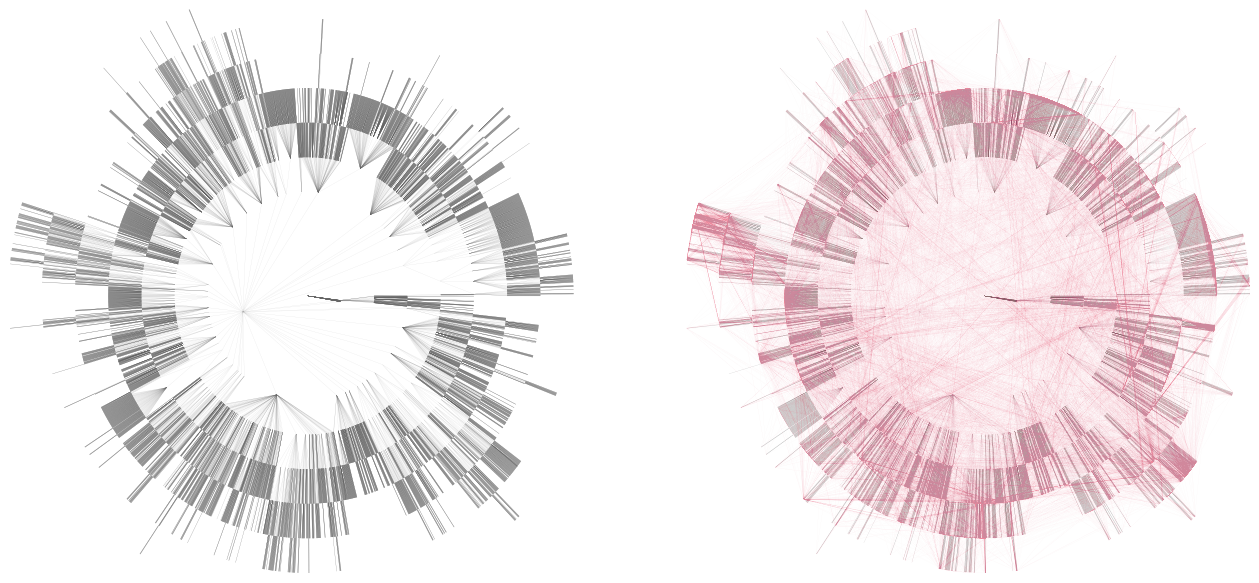

In [82]:
# Setup figure
plt.Figure()
f = plt.gcf()
f.set_size_inches(16, 8)

# Create first network in upper left
ax2 = plt.subplot2grid((1,2), (0,0), colspan=1)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.axis('off')
ax2.set_adjustable("box")
ax2.set_aspect(1.0)
#plt.title("1810", fontsize=12, family="Bitstream Vera Sans")

# Create line collection
lc = []
for e in hg.es:
    lc.append([(coord_df.loc[e.source, "xs"], coord_df.loc[e.source, "ys"]),
               (coord_df.loc[e.target, "xs"], coord_df.loc[e.target, "ys"])])

# Add to figure
_ = ax2.add_collection(mc.LineCollection(lc, color="#545454", alpha=0.25, linewidths=0.1))

del lc

# Create second network in upper middle
ax3 = plt.subplot2grid((1,2), (0,1), colspan=1)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.axis("off")
ax3.set_adjustable("box")
ax3.set_aspect(1.0)
#plt.title("1820", fontsize=12, family="Bitstream Vera Sans")

# Create line collection
lc = []
for e in hg.es:
    lc.append([(coord_df.loc[e.source, "xs"], coord_df.loc[e.source, "ys"]),
               (coord_df.loc[e.target, "xs"], coord_df.loc[e.target, "ys"])])

# Add to figure
_ = ax3.add_collection(mc.LineCollection(lc, color="#545454", alpha=0.1, linewidths=0.1))

del lc

# Create line collection
lc = []
for e in clean_cg.es:
    lc.append([(coord_df.loc[e.source, "xs"], coord_df.loc[e.source, "ys"]),
               (coord_df.loc[e.target, "xs"], coord_df.loc[e.target, "ys"])])

# Add to figure
_ = ax3.add_collection(mc.LineCollection(lc, color="#dc143c", alpha=0.1, linewidths=0.05))

del lc

plt.savefig("../figures/us_code_20100308_subplots.png", figsize=(16, 8), dpi=400)
plt.savefig("../figures/us_code_20100308_subplots.eps", figsize=(16, 8), dpi=400)
plt.savefig("../figures/us_code_20100308_subplots.pdf", figsize=(16, 8), dpi=400)